# Análise de Microdados do ENEM 2022

## Neste projeto de estudo estarei fazendo uma breve análise exploratória à partir dos microdados do ENEM 2022.
### Dataset retirado deste [link](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Lendo arquivo CSV e conhecendo os microdados do arquivo

In [2]:
df = pd.read_csv('H:\ENEM 2022\DADOS\MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1')
df.shape

(3476105, 76)

In [3]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

### Removendo colunas com pouca relevância para o estudo para otimizar o processamento

In [4]:
colunas_remover = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA']
df_otimizado = df.drop(colunas_remover, axis=1)
df_otimizado.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018

### Verificando dados nulos

In [5]:
valores_nulos = df_otimizado.isnull().sum()
valores_nulos

TP_FAIXA_ETARIA     0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_NACIONALIDADE    0
                   ..
Q021                0
Q022                0
Q023                0
Q024                0
Q025                0
Length: 70, dtype: int64

___
## Análise candidatos por faixa etária
### Modificando o valor da faixa etária, de acordo com a indicado na documentação do arquivo CSV:

TP_FAIXA_ETARIA | Faixa etária
--------------- | ------------
1 | Menor de 17 anos
2 | 17 anos
3 | 18 anos
4 | 19 anos
5 | 20 anos
6 | 21 anos
7 | 22 anos
8 | 23 anos
9 | 24 anos
10 | 25 anos
11 | Entre 26 e 30 anos
12 | Entre 31 e 35 anos
13 | Entre 36 e 40 anos
14 | Entre 41 e 45 anos
15 | Entre 46 e 50 anos
16 | Entre 51 e 55 anos
17 | Entre 56 e 60 anos
18 | Entre 61 e 65 anos
19 | Entre 66 e 70 anos
20 | Maior de 70 anos


In [6]:
mapeamento_faixas_etarias = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

df['FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].map(mapeamento_faixas_etarias)
df['FAIXA_ETARIA'] = pd.Categorical(df['FAIXA_ETARIA'], categories=mapeamento_faixas_etarias.values(), ordered=True)
contagem_faixas_etarias = df['FAIXA_ETARIA'].value_counts()
contagem_faixas_etarias = contagem_faixas_etarias.sort_index()

### Criando gráfico para análise de participantes por faixa etária

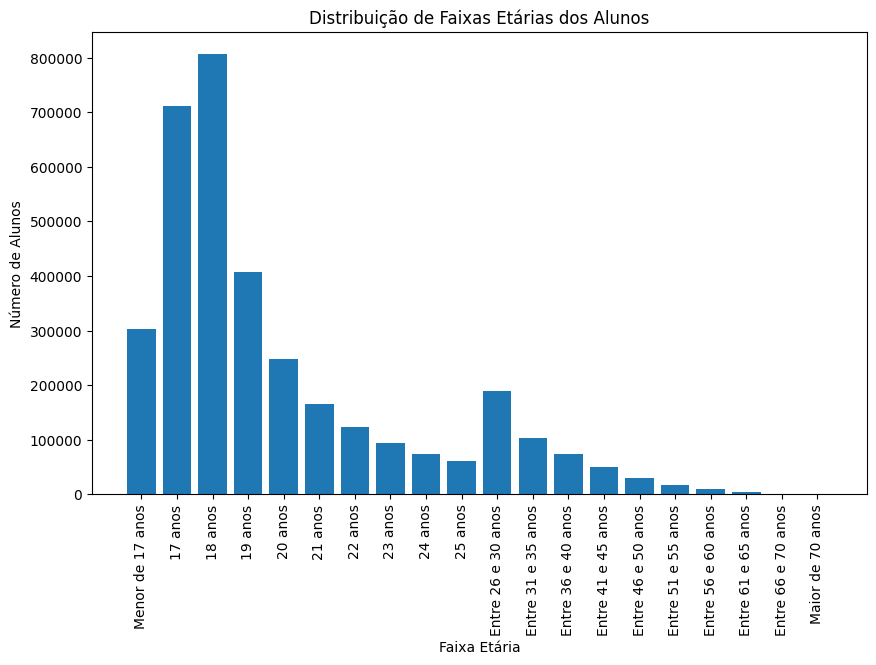

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(contagem_faixas_etarias.index, contagem_faixas_etarias.values)

plt.xlabel('Faixa Etária')
plt.ylabel('Número de Alunos')
plt.title('Distribuição de Faixas Etárias dos Alunos')

plt.xticks(rotation=90);

___
## Análise número de participantes por gênero

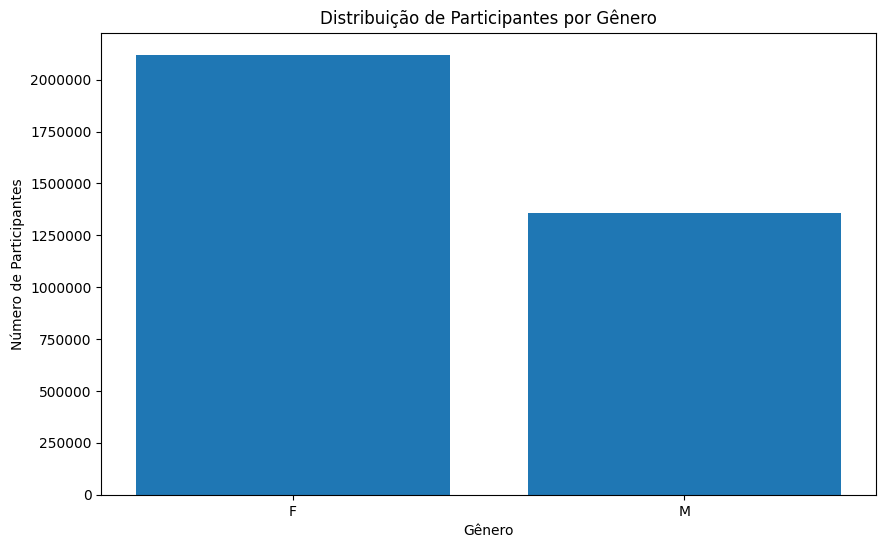

In [10]:
contagem_genero = df_otimizado['TP_SEXO'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(contagem_genero.index, contagem_genero.values)
plt.xlabel('Gênero')
plt.ylabel('Número de Participantes')
plt.title('Distribuição de Participantes por Gênero')
plt.ticklabel_format(style='plain', axis='y')

In [11]:
total = contagem_genero.sum()
porcentagem_genero = (contagem_genero / total) * 100
porcentagem_genero

TP_SEXO
F    61.002732
M    38.997268
Name: count, dtype: float64

Através dos dados obtidos nesse último gráfico, podemos perceber que aproximadamente 61% dos participantes do ENEM 2022 se identificam com o gênero Feminino e 39% com o gênero Masculino

___
## Análise de participantes por Estado

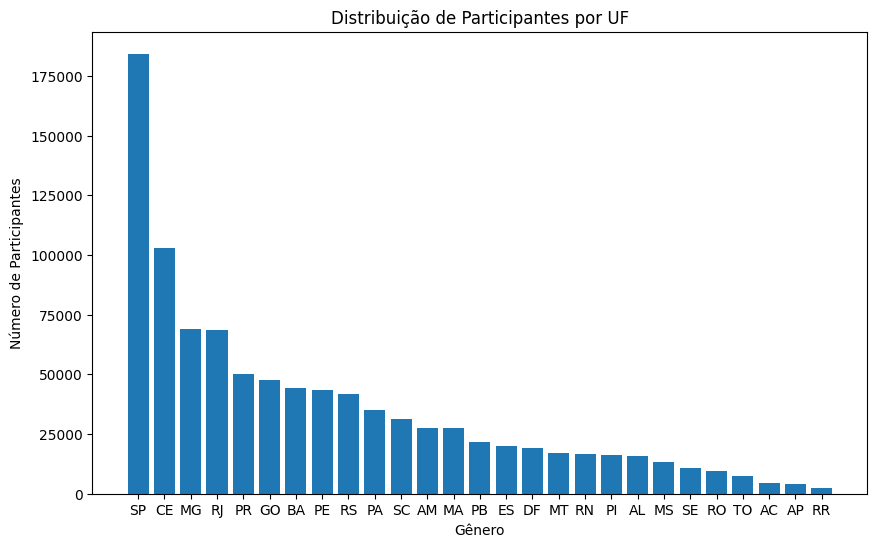

In [12]:
contagem_uf = df_otimizado['SG_UF_ESC'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(contagem_uf.index, contagem_uf.values)
plt.xlabel('Gênero')
plt.ylabel('Número de Participantes')
plt.title('Distribuição de Participantes por UF')
plt.ticklabel_format(style='plain', axis='y')


### Notas dos participantes por UF

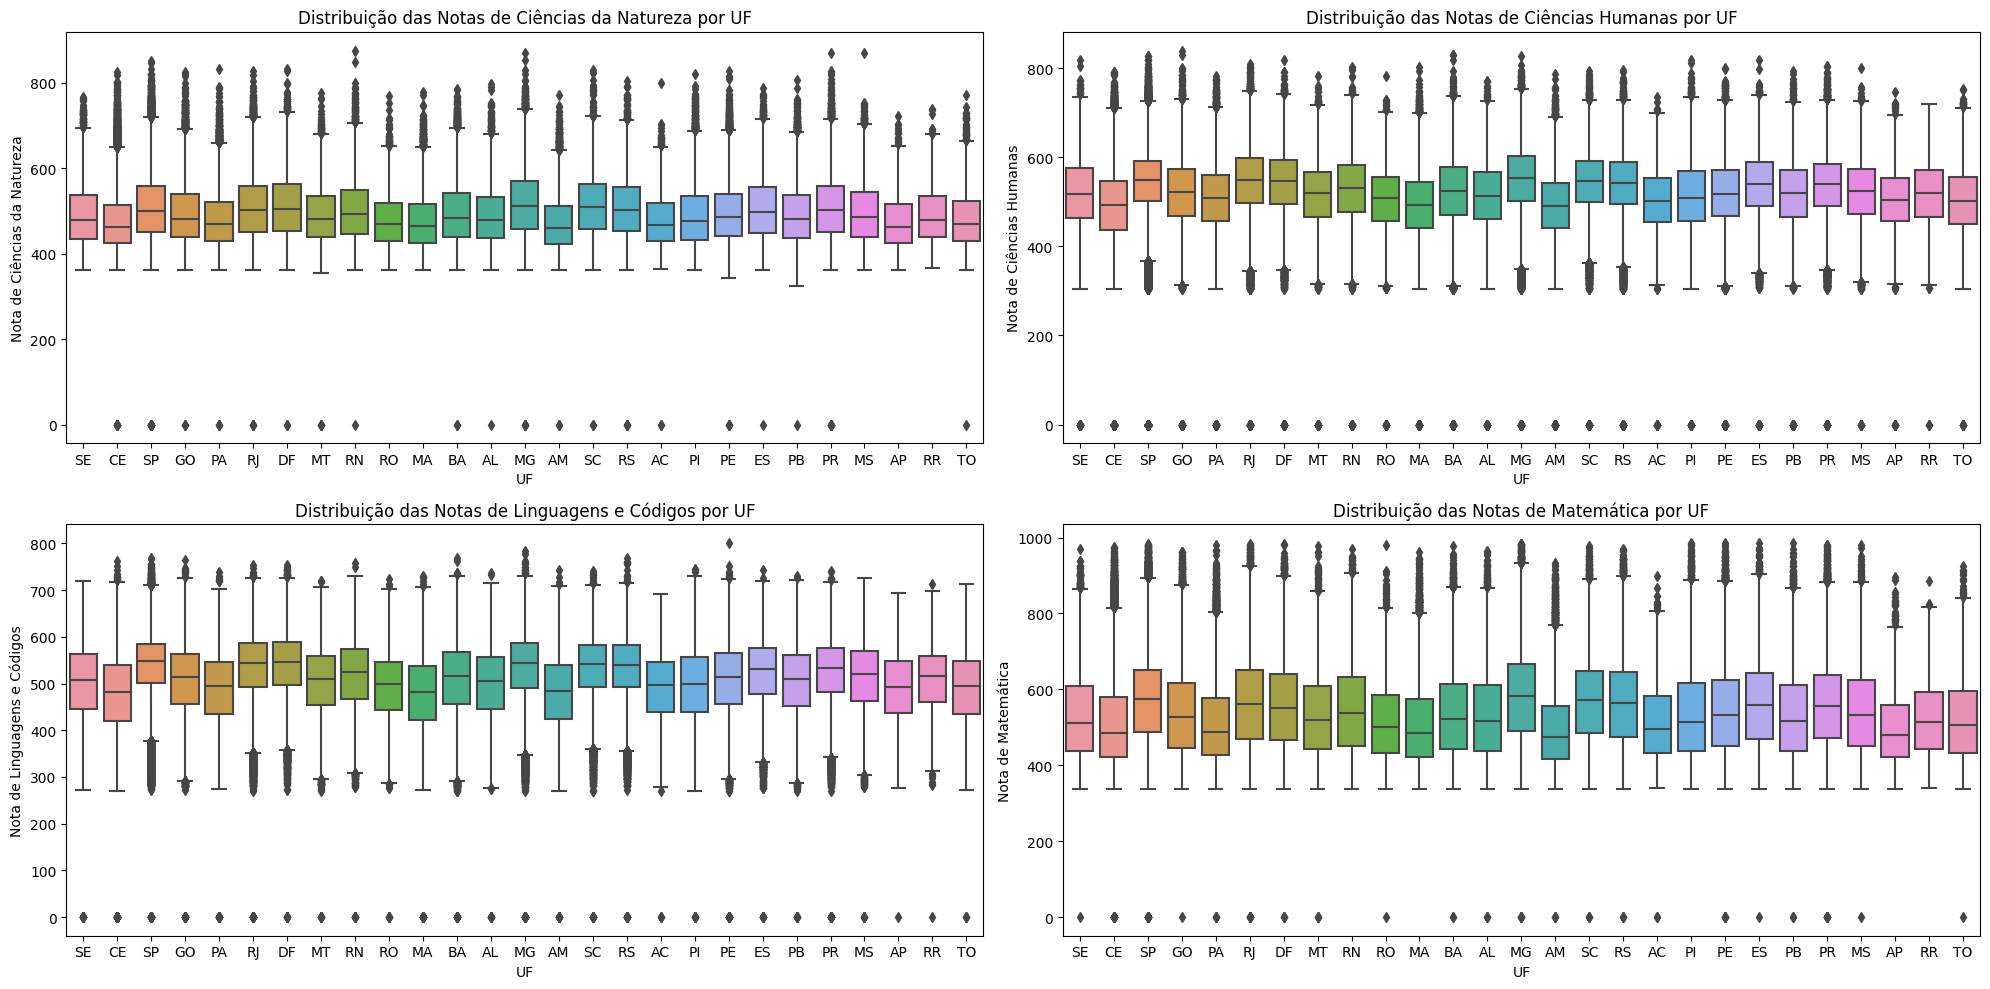

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.boxplot(x='SG_UF_ESC', y='NU_NOTA_CN', data=df_otimizado, ax=axes[0, 0])
axes[0, 0].set_xlabel('UF')
axes[0, 0].set_ylabel('Nota de Ciências da Natureza')
axes[0, 0].set_title('Distribuição das Notas de Ciências da Natureza por UF')

sns.boxplot(x='SG_UF_ESC', y='NU_NOTA_CH', data=df_otimizado, ax=axes[0, 1])
axes[0, 1].set_xlabel('UF')
axes[0, 1].set_ylabel('Nota de Ciências Humanas')
axes[0, 1].set_title('Distribuição das Notas de Ciências Humanas por UF')

sns.boxplot(x='SG_UF_ESC', y='NU_NOTA_LC', data=df_otimizado, ax=axes[1, 0])
axes[1, 0].set_xlabel('UF')
axes[1, 0].set_ylabel('Nota de Linguagens e Códigos')
axes[1, 0].set_title('Distribuição das Notas de Linguagens e Códigos por UF')

sns.boxplot(x='SG_UF_ESC', y='NU_NOTA_MT', data=df_otimizado, ax=axes[1, 1])
axes[1, 1].set_xlabel('UF')
axes[1, 1].set_ylabel('Nota de Matemática')
axes[1, 1].set_title('Distribuição das Notas de Matemática por UF')

plt.tight_layout()
plt.show()

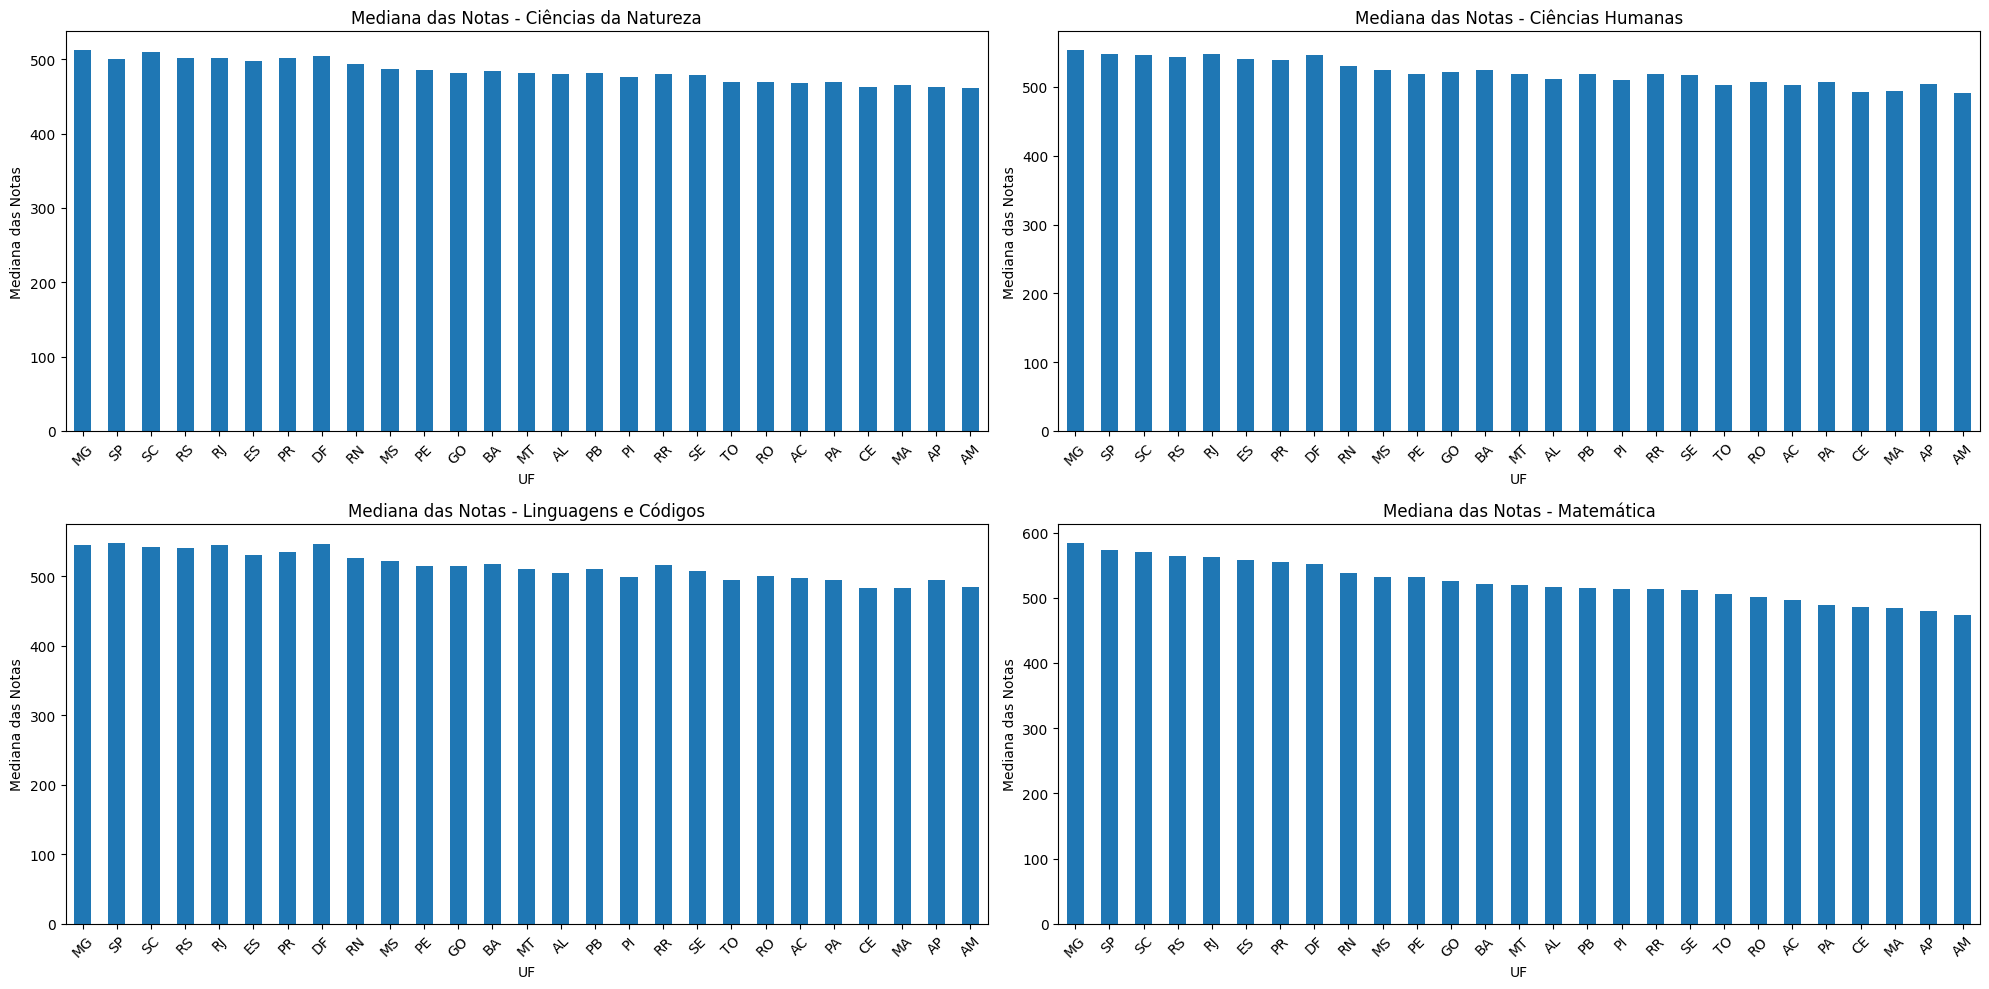

In [14]:
nomes_disciplinas = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática'
}
colunas_notas = list(nomes_disciplinas.keys())
medianas = df_otimizado.groupby('SG_UF_ESC')[colunas_notas].median()
medianas = medianas.sort_values(by='NU_NOTA_MT', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))


ax_positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for coluna, ax_pos in zip(colunas_notas, ax_positions):
    nome_disciplina = nomes_disciplinas[coluna]
    medianas[[coluna]].plot(kind='bar', ax=axes[ax_pos], legend=False)
    axes[ax_pos].set_xlabel('UF')
    axes[ax_pos].set_ylabel('Mediana das Notas')
    axes[ax_pos].set_title(f'Mediana das Notas - {nome_disciplina}')
    axes[ax_pos].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## Comparando as notas de acordo com as regiões do Brasil

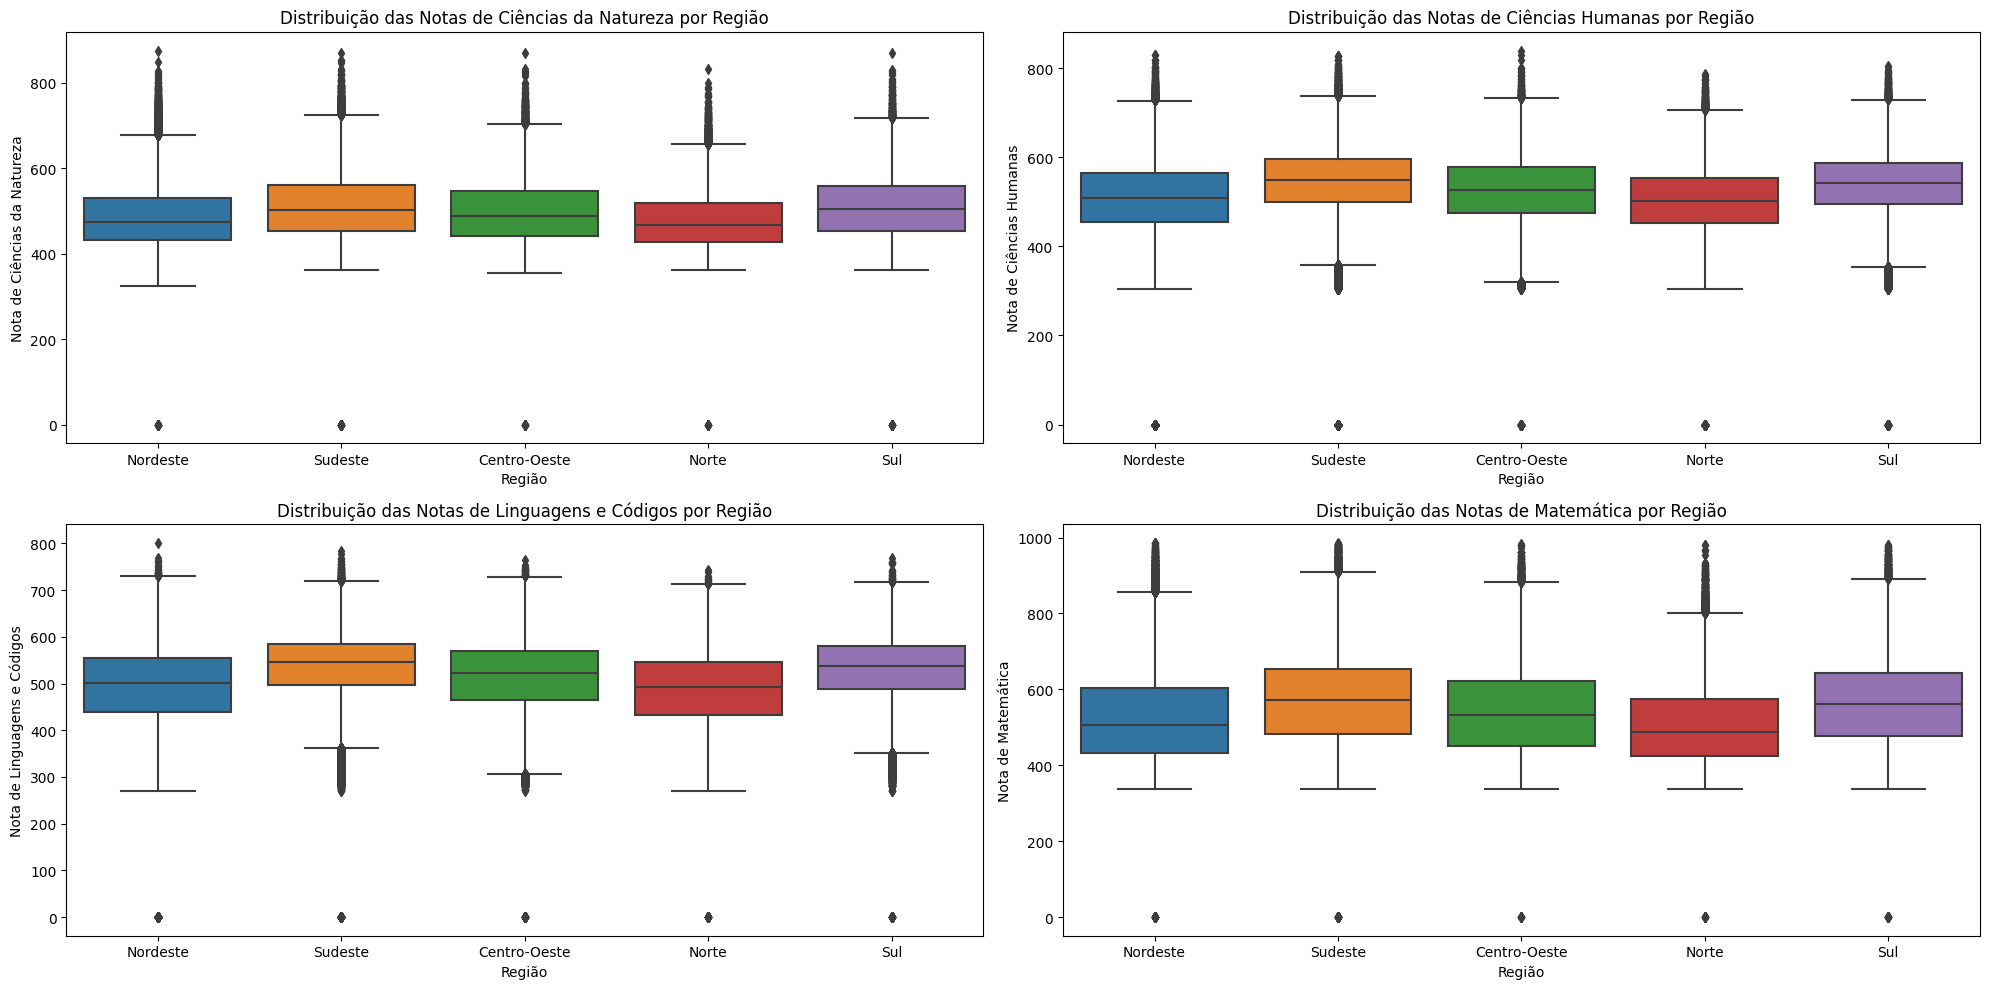

In [15]:
mapeamento_regioes = {
    'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
    'Nordeste': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
    'Sul': ['PR', 'SC', 'RS'],
    'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
    'Centro-Oeste': ['MS', 'MT', 'GO', 'DF']
}
df_regioes = df_otimizado.copy()
df_regioes['Regiao'] = df_regioes['SG_UF_ESC'].map({uf: regiao for regiao, ufs in mapeamento_regioes.items() for uf in ufs})

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(x='Regiao', y='NU_NOTA_CN', data=df_regioes, ax=axes[0, 0])
axes[0, 0].set_xlabel('Região')
axes[0, 0].set_ylabel('Nota de Ciências da Natureza')
axes[0, 0].set_title('Distribuição das Notas de Ciências da Natureza por Região')

sns.boxplot(x='Regiao', y='NU_NOTA_CH', data=df_regioes, ax=axes[0, 1])
axes[0, 1].set_xlabel('Região')
axes[0, 1].set_ylabel('Nota de Ciências Humanas')
axes[0, 1].set_title('Distribuição das Notas de Ciências Humanas por Região')

sns.boxplot(x='Regiao', y='NU_NOTA_LC', data=df_regioes, ax=axes[1, 0])
axes[1, 0].set_xlabel('Região')
axes[1, 0].set_ylabel('Nota de Linguagens e Códigos')
axes[1, 0].set_title('Distribuição das Notas de Linguagens e Códigos por Região')

sns.boxplot(x='Regiao', y='NU_NOTA_MT', data=df_regioes, ax=axes[1, 1])
axes[1, 1].set_xlabel('Região')
axes[1, 1].set_ylabel('Nota de Matemática')
axes[1, 1].set_title('Distribuição das Notas de Matemática por Região')

plt.tight_layout()
plt.show()